In [1]:
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
import numpy as np
import pandas as pd
import tensorflow as tf

from imbd.trainers import ModelTrainer
from imbd.data import DataLoader
from imbd.preprocessors import DataPreprocessor
from imbd.models import KerasModel

In [2]:
loader = DataLoader()
prepro = DataPreprocessor()


In [3]:
param_grid = {
    "prepro__variance_selector__threshold": [0.0, 0.01],
    # "voting__estimator__xgb__subsample": [1, 0.5],
    # "voting__estimator__xgb__max_depth": [2, 6],
    # "voting__estimator__xgb_rf__max_depth": [2, 6],
    # "voting__estimator__xgb_rf__subsample": [1, 0.5],
    # "voting__estimator__xgb__n_estimators": [1000],
    # "voting__estimator__xgb_rf__n_estimators": [1000],
}

In [20]:
# initialization
loader = DataLoader()
preprocessor = DataPreprocessor()
df = loader.build()

# get feature & label
train_features = df.drop(loader.labels, axis=1)
train_labels = df[loader.labels]

In [21]:
# base_model = MultiOutputRegressor(XGBRegressor())
base_model = MultiOutputRegressor(VotingRegressor([('xgb', XGBRegressor()), ('xgb_rf', XGBRFRegressor())]))

# base_nn_model = KerasRegressor(build_fn=classifier, epochs=100)
base_nn_model = KerasModel()

In [22]:
# build pipeline
steps = [('prepro', preprocessor), ('voting', base_model)]
pipe = Pipeline(steps=steps)

In [23]:
pipe.get_params()['voting'].get_params()

{'estimators': [('xgb',
   XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None)),
  ('xgb_rf',
   XGBRFRegressor(base_score=None, booster=None, colsample_bylevel=None,
                  colsample_bytree=None, gamma=None, gpu_id=None,
                  importance_type='gain', interaction_constraints=None,
                  max_delta_step=None, max_depth=None, min_child_weight=None,
                  miss

In [24]:
# training
trainer = ModelTrainer(pipe=pipe, param_grid=param_grid, verbose=2)
fitted = trainer.fit(train_features, train_labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] prepro__variance_selector__threshold=0.0 ........................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[CV] ......... prepro__variance_selector__threshold=0.0, total=   1.9s
[CV] prepro__variance_selector__threshold=0.0 ........................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s

If you intended to run this layer in float32, you can safely ignore this w

In [25]:
fitted.best_score_

-0.7526954233059354

In [26]:
pd.DataFrame(fitted.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prepro__variance_selector__threshold,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.777467,0.263083,0.315497,0.064164,0,{'prepro__variance_selector__threshold': 0.0},-0.838169,-0.804774,-0.615143,-0.752695,0.098215,1,-0.123807,-0.111984,-0.122085,-0.119292,0.005215
1,1.652298,0.171789,0.284815,0.029520,0.01,{'prepro__variance_selector__threshold': 0.01},-1.004189,-0.882802,-0.609624,-0.832205,0.165006,2,-0.220130,-0.173609,-0.247563,-0.213767,0.030525


In [11]:
pred = fitted.predict(train_features)
pred = pd.DataFrame(pred, columns=train_labels.columns)

res = np.abs(pred - train_labels)
res = res.rename(mapper=lambda x: x + "_diff", axis=1)
res['mean'] = np.mean(res, axis=1)
res['label'] = pd.cut(res['mean'].astype('category'), bins=3, labels=['0', '1', '2'])
res['label'] = res['label'].astype(int)

AttributeError: 'Series' object has no attribute 'columns'

In [12]:
res

NameError: name 'res' is not defined

In [13]:
import plotly.express as px

In [14]:
res.filter(regex='Input_A[0-9]*_[0-9]+').columns

NameError: name 'res' is not defined

In [15]:
train_labels.columns

AttributeError: 'Series' object has no attribute 'columns'

In [16]:
train_features.columns.values

array(['Input_A1_001', 'Input_A1_002', 'Input_A1_003', 'Input_A1_004',
       'Input_A1_005', 'Input_A1_006', 'Input_A1_007', 'Input_A1_008',
       'Input_A1_009', 'Input_A1_010', 'Input_A1_011', 'Input_A1_012',
       'Input_A1_013', 'Input_A1_014', 'Input_A1_015', 'Input_A1_016',
       'Input_A1_017', 'Input_A1_018', 'Input_A1_019', 'Input_A1_021',
       'Input_A1_022', 'Input_A1_023', 'Input_A1_024', 'Input_A2_001',
       'Input_A2_002', 'Input_A2_003', 'Input_A2_004', 'Input_A2_005',
       'Input_A2_006', 'Input_A2_007', 'Input_A2_008', 'Input_A2_009',
       'Input_A2_010', 'Input_A2_011', 'Input_A2_012', 'Input_A2_013',
       'Input_A2_014', 'Input_A2_015', 'Input_A2_018', 'Input_A2_019',
       'Input_A2_020', 'Input_A2_021', 'Input_A2_022', 'Input_A2_023',
       'Input_A3_001', 'Input_A3_002', 'Input_A3_003', 'Input_A3_004',
       'Input_A3_005', 'Input_A3_006', 'Input_A3_007', 'Input_A3_008',
       'Input_A3_009', 'Input_A3_010', 'Input_A3_011', 'Input_A3_012',
      

In [17]:
feature_cols = list(train_features.filter(regex='A_020_mean').columns)
diff_cols = list(res.filter(regex='Input_A1_[0-9]+_diff').columns[:5])

fig = px.parallel_coordinates(pd.concat([train_features, res], axis=1), feature_cols + diff_cols + ['label'] , color='label')
fig.update_layout(width=1600, height=800)
fig.show()

NameError: name 'res' is not defined

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

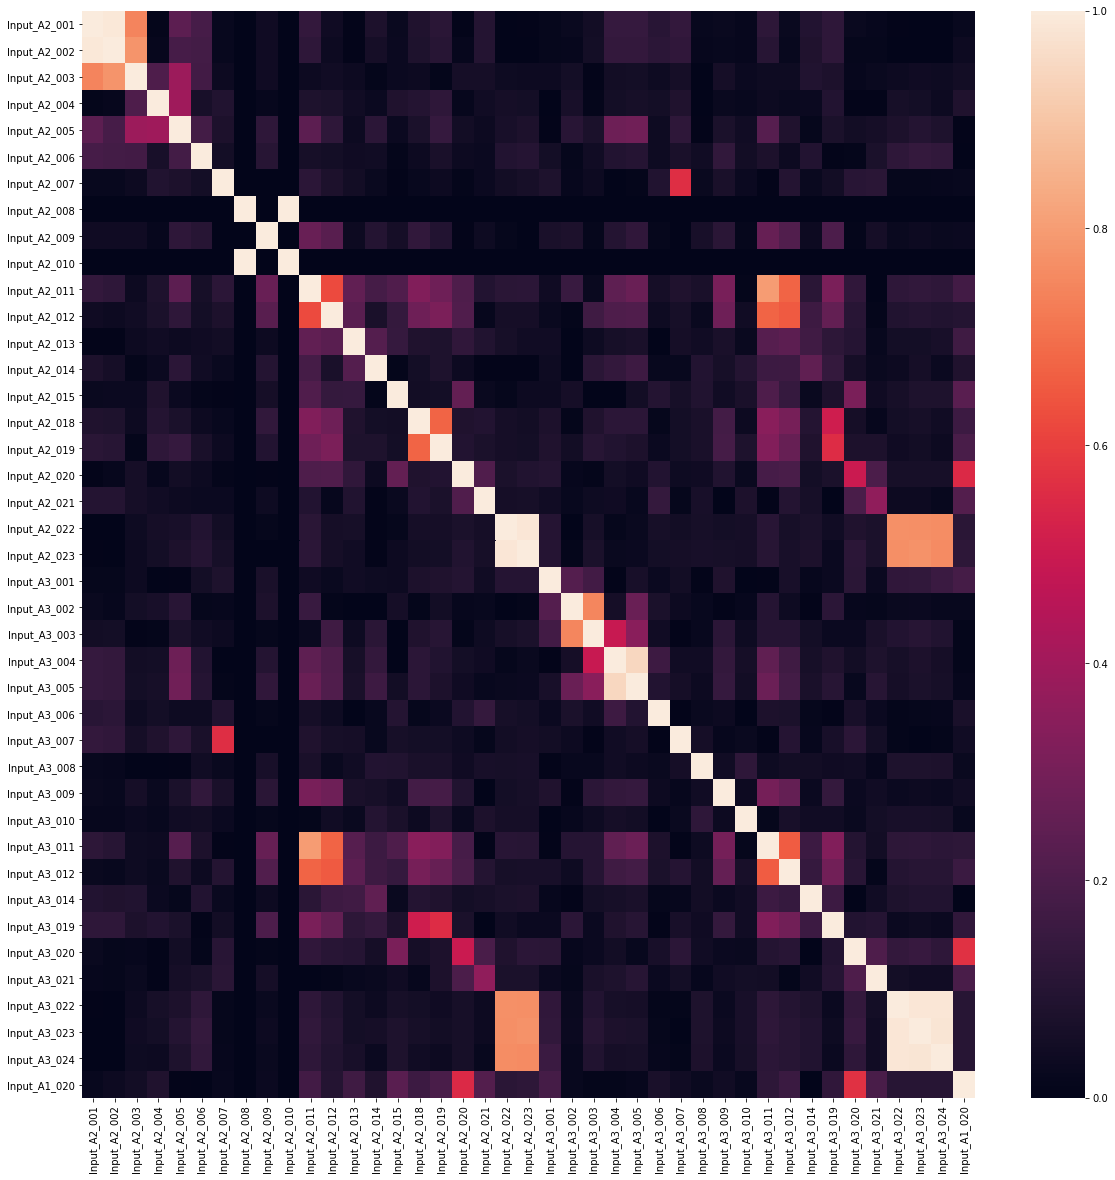

In [19]:
fig_, ax = plt.subplots(figsize=(20, 20))
test = pd.concat([train_features,train_labels], axis=1)
sns.heatmap(np.abs(test.filter(regex='(Input_A[2-3]_[0-9]+|Input_A1_020)').corr()))